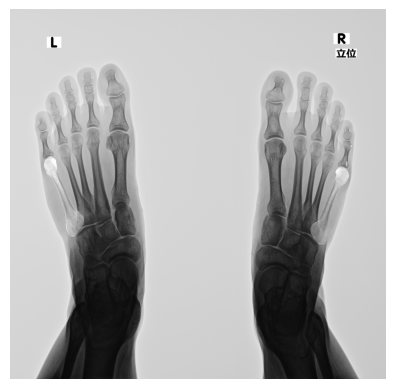

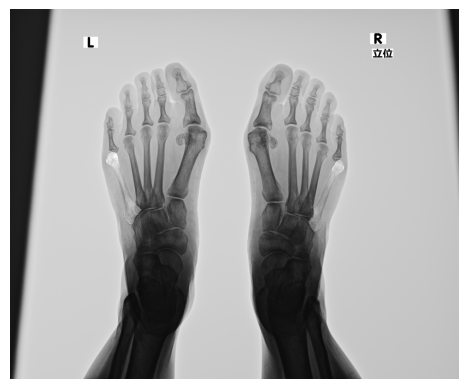

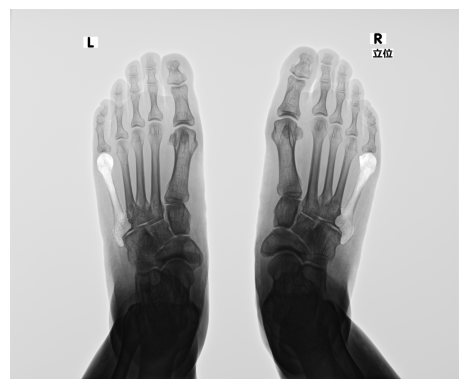

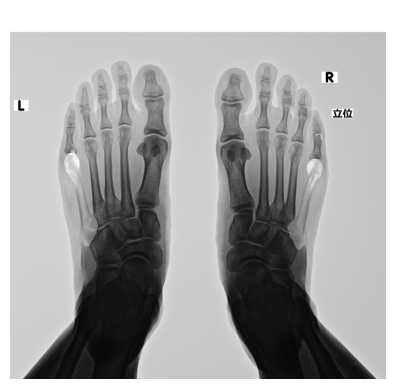

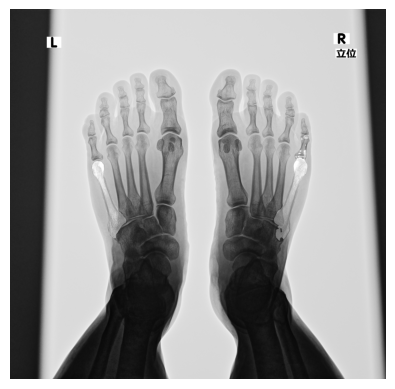

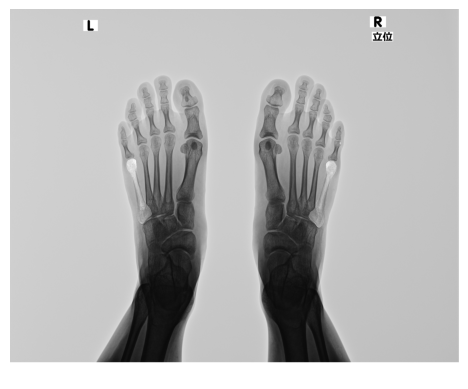

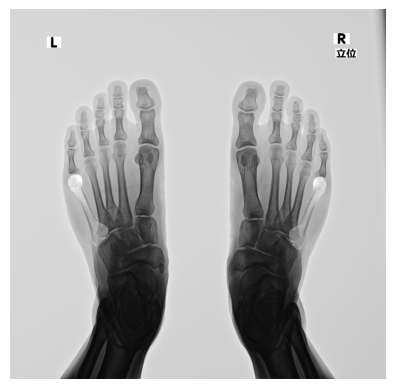

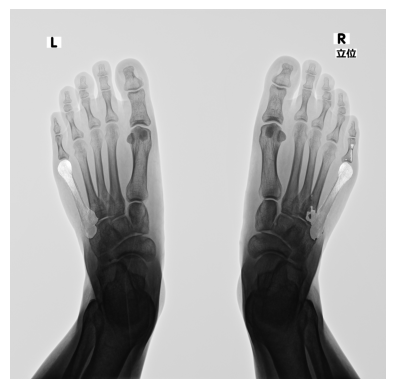

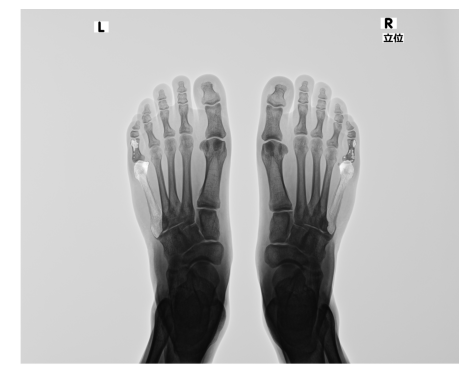

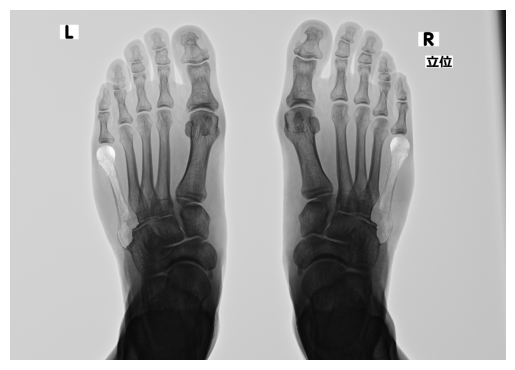

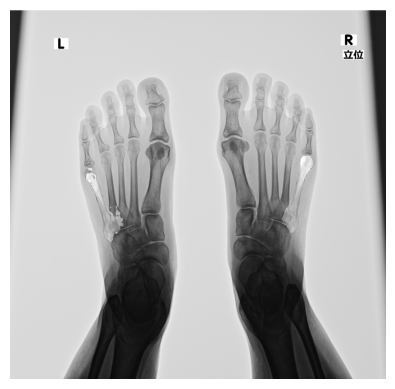

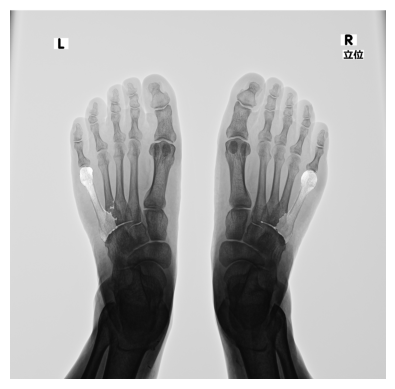

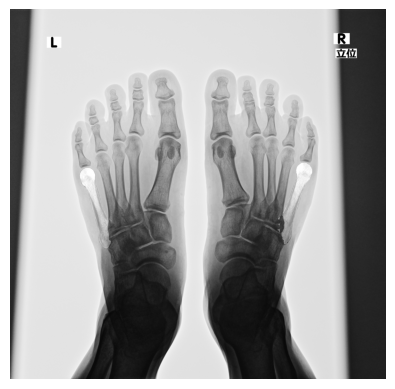

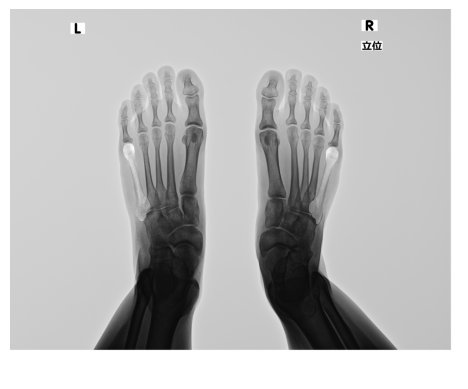

In [3]:
import os
import cv2
import re
import matplotlib.pyplot as plt

def extract_number(filename):
    # 最初に数値がマッチした数値を取り出す(\d+は1つ以上の数字にマッチ)
    return int(re.search(r'\d+', filename).group())

# 画像が保存されているディレクトリパス
image_folder = "/home/kubota/study/segment-anything/src/images"
mask_folder = "/home/kubota/study/segment-anything/assets/MASKM1M5"
output_folder = "/home/kubota/study/segment-anything/assets/mask_overlay"

# 画像ファイル名リストを取得
image_files = sorted(os.listdir(image_folder), key=extract_number)
mask_files = sorted(os.listdir(mask_folder), key=extract_number)

mask_iterator = iter(mask_files)

# 画像と2つのマスクを読み込み、透明度を調整して重ね合わせる
# image_file内の画像を読み込み、その都度next(mask_iterator)を二回使用して対応するマスクを重ねる
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    
    mask_file1 = next(mask_iterator)
    mask_file2 = next(mask_iterator)
    mask_path1 = os.path.join(mask_folder, mask_file1)
    mask_path2 = os.path.join(mask_folder, mask_file2)

    # 画像をカラーで読み込む
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # マスク画像をカラーで読み込み、元の画像と同じサイズにリサイズする
    mask1 = cv2.imread(mask_path1, cv2.IMREAD_COLOR)
    mask2 = cv2.imread(mask_path2, cv2.IMREAD_COLOR)

    # 透明度を調整して2つのマスクを重ね合わせる
    overlaid = cv2.addWeighted(image, 1, mask1, 0.3, 0)
    overlaid = cv2.addWeighted(overlaid, 1, mask2, 0.3, 0)

    # 保存するファイルのパスを生成
    output_path = os.path.join(output_folder, f"{extract_number(image_file)}_overlay.png")
    cv2.imwrite(output_path, overlaid)

    # Matplotlibで重ね合わせた画像を表示
    plt.imshow(cv2.cvtColor(overlaid, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
